# Modeling

Pada tahapan ini dilakukan pemodelan pada dataset yang sudah dilakukan preprocessing sebelumnya.

## Hyperparameter Tuning Random Forest

### Random Forest with SMOTE

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Inisialisasi model
rf = RandomForestClassifier(random_state=42)

# Hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Inisialisasi GridSearchCV
grid_search_rf_smote = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    verbose=2 
)


start = time.time()
# Jalankan GridSearch
grid_search_rf_smote.fit(X_train_smote, y_train_smote)

end = time.time()
duration = end - start

# Tampilkan hasil terbaik
print("Best Params:", grid_search_rf_smote.best_params_)
print("Best Cross-Validated Accuracy:", grid_search_rf_smote.best_score_)
print(f"Durasi training: {duration:.2f} detik")

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time= 6.7min
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=10.3min
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time= 6.8min
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time= 6.8min
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time= 6.4min
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time= 9.5min
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time= 6.3min
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=10.3min
[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time= 3.4min
[CV] END max_depth=No

In [33]:
print("Best Params:", grid_search_rf_smote.best_params_)

Best Params: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [34]:
grid_search_rf_smote.get_params()

{'cv': 5,
 'error_score': nan,
 'estimator__bootstrap': True,
 'estimator__ccp_alpha': 0.0,
 'estimator__class_weight': None,
 'estimator__criterion': 'gini',
 'estimator__max_depth': None,
 'estimator__max_features': 'sqrt',
 'estimator__max_leaf_nodes': None,
 'estimator__max_samples': None,
 'estimator__min_impurity_decrease': 0.0,
 'estimator__min_samples_leaf': 1,
 'estimator__min_samples_split': 2,
 'estimator__min_weight_fraction_leaf': 0.0,
 'estimator__monotonic_cst': None,
 'estimator__n_estimators': 100,
 'estimator__n_jobs': None,
 'estimator__oob_score': False,
 'estimator__random_state': 42,
 'estimator__verbose': 0,
 'estimator__warm_start': False,
 'estimator': RandomForestClassifier(random_state=42),
 'n_jobs': -1,
 'param_grid': {'n_estimators': [100, 200, 300],
  'max_depth': [None, 10, 20, 30],
  'min_samples_split': [2, 5, 10],
  'min_samples_leaf': [1, 2, 4]},
 'pre_dispatch': '2*n_jobs',
 'refit': True,
 'return_train_score': False,
 'scoring': 'f1',
 'verbose': 

Confusion Matrix:


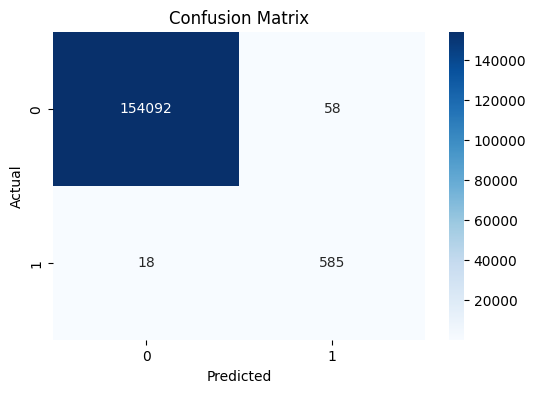

Accuracy: 0.9995088948194866
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    154150
           1       0.91      0.97      0.94       603

    accuracy                           1.00    154753
   macro avg       0.95      0.98      0.97    154753
weighted avg       1.00      1.00      1.00    154753

F2-Score: 0.9574468085106383
F1/2-Score (harmonik dari F1 dan F2): 0.9481361426256079


In [35]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, fbeta_score

y_pred_rf_smote = grid_search_rf_smote.predict(X_test_scaled)

# 1. Confusion Matrix
print("Confusion Matrix:")
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf_smote), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# 2. Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred_rf_smote))

# 3. Classification Report (berisi precision, recall, f1-score per kelas)
print("Classification Report:")
print(classification_report(y_test, y_pred_rf_smote))

# 4. F2-Score
f2 = fbeta_score(y_test, y_pred_rf_smote, beta=2, average='binary')  # binary → untuk dua kelas
print("F2-Score:", f2)

# 5. F1/2-Score (harmonic mean dari F1 dan F2 secara manual)
f1 = fbeta_score(y_test, y_pred_rf_smote, beta=1, average='binary')
f2 = fbeta_score(y_test, y_pred_rf_smote, beta=2, average='binary')
f1_2 = 2 * f1 * f2 / (f1 + f2) if (f1 + f2) != 0 else 0
print("F1/2-Score (harmonik dari F1 dan F2):", f1_2)

### Random Forest Adasyn

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Inisialisasi model
rf = RandomForestClassifier(random_state=42)

# Hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Inisialisasi GridSearchCV
grid_search_rf_adasyn = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    verbose=2 
)

start = time.time()
# Jalankan GridSearch
grid_search_rf_adasyn.fit(X_train_adasyn, y_train_adasyn)

end = time.time()
duration = end - start

# Tampilkan hasil terbaik
print("Best Params:", grid_search_rf_adasyn.best_params_)
print("Best Cross-Validated Accuracy:", grid_search_rf_adasyn.best_score_)
print(f"Durasi training: {duration:.2f} detik")

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time= 7.3min
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time= 7.3min
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time= 7.5min
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time= 4.4min
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time= 4.4min
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time= 6.5min
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time= 6.3min
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time= 6.3min
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time= 7.5min
[CV] END max_depth

Confusion Matrix:


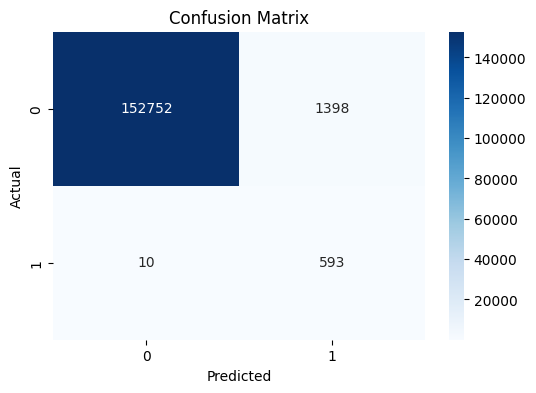

Accuracy: 0.9909016303399611
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00    154150
           1       0.30      0.98      0.46       603

    accuracy                           0.99    154753
   macro avg       0.65      0.99      0.73    154753
weighted avg       1.00      0.99      0.99    154753

F2-Score: 0.6734044969339087
F1/2-Score (harmonik dari F1 dan F2): 0.5446362968405584


In [38]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, fbeta_score

y_pred_rf_adasyn = grid_search_rf_adasyn.predict(X_test_scaled)

# 1. Confusion Matrix
print("Confusion Matrix:")
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf_adasyn), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# 2. Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred_rf_adasyn))

# 3. Classification Report (berisi precision, recall, f1-score per kelas)
print("Classification Report:")
print(classification_report(y_test, y_pred_rf_adasyn))

# 4. F2-Score
f2 = fbeta_score(y_test, y_pred_rf_adasyn, beta=2, average='binary')  # binary → untuk dua kelas
print("F2-Score:", f2)

# 5. F1/2-Score (harmonic mean dari F1 dan F2 secara manual)
f1 = fbeta_score(y_test, y_pred_rf_adasyn, beta=1, average='binary')
f2 = fbeta_score(y_test, y_pred_rf_adasyn, beta=2, average='binary')
f1_2 = 2 * f1 * f2 / (f1 + f2) if (f1 + f2) != 0 else 0
print("F1/2-Score (harmonik dari F1 dan F2):", f1_2)

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Inisialisasi model
rf = RandomForestClassifier(random_state=42)

# Hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Inisialisasi GridSearchCV
grid_search_rf_enn = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    verbose=2 
)


start_rf_enn = time.time()
# Jalankan GridSearch
grid_search_rf_enn.fit(X_train_enn, y_train_enn)

end_rf_enn = time.time()
duration_rf_enn = end - start

# Tampilkan hasil terbaik
print("Best Params:", grid_search_rf_enn.best_params_)
print("Best Cross-Validated Accuracy:", grid_search_rf_enn.best_score_)
print(f"Durasi training: {duration_rf_enn:.2f} detik")

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time= 3.6min
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=10.2min
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time= 6.8min
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time= 4.8min
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time= 2.4min
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time= 7.3min
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time= 3.3min
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=10.0min
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time= 6.9min
[CV] END max_depth=3

In [41]:
duration_rf_enn = end_rf_enn - start_rf_enn
print(duration_rf_enn)

4411.803577899933


Confusion Matrix:


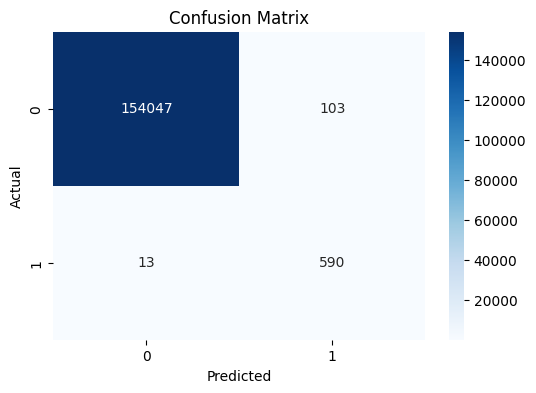

Accuracy: 0.99925041840869
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    154150
           1       0.85      0.98      0.91       603

    accuracy                           1.00    154753
   macro avg       0.93      0.99      0.96    154753
weighted avg       1.00      1.00      1.00    154753

F2-Score: 0.9500805152979066
F1/2-Score (harmonik dari F1 dan F2): 0.929866036249015


In [40]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, fbeta_score

y_pred_rf_enn = grid_search_rf_enn.predict(X_test_scaled)

# 1. Confusion Matrix
print("Confusion Matrix:")
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf_enn), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# 2. Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred_rf_enn))

# 3. Classification Report (berisi precision, recall, f1-score per kelas)
print("Classification Report:")
print(classification_report(y_test, y_pred_rf_enn))

# 4. F2-Score
f2 = fbeta_score(y_test, y_pred_rf_enn, beta=2, average='binary')  # binary → untuk dua kelas
print("F2-Score:", f2)

# 5. F1/2-Score (harmonic mean dari F1 dan F2 secara manual)
f1 = fbeta_score(y_test, y_pred_rf_enn, beta=1, average='binary')
f2 = fbeta_score(y_test, y_pred_rf_enn, beta=2, average='binary')
f1_2 = 2 * f1 * f2 / (f1 + f2) if (f1 + f2) != 0 else 0
print("F1/2-Score (harmonik dari F1 dan F2):", f1_2)

## Hyperparameter Tuning XGBoost

## Xgboost SMOTE

### XGBoost dengan SMOTE

In [42]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Inisialisasi model XGBoost
xgb = XGBClassifier(eval_metric='logloss', random_state=42)

# Hyperparameter grid untuk XGBoost
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0]
}

# Inisialisasi GridSearchCV
grid_search_xgb_smote = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid_xgb,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    verbose=2
)

# Jalankan GridSearch pada data SMOTE


start_xgb_smote = time.time()
# Jalankan GridSearch
grid_search_xgb_smote.fit(X_train_smote, y_train_smote)

end_xgb_smote = time.time()
duration_xgb_smote = end_xgb_smote - start_xgb_smote

# Tampilkan hasil terbaik
print("Best Params:", grid_search_xgb_smote.best_params_)
print("Best Cross-Validated F1 Score:", grid_search_xgb_smote.best_score_)
print(f"Durasi training: {duration_xgb_smote:.2f} detik")

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Params: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 300, 'subsample': 1.0}
Best Cross-Validated F1 Score: 0.9997470595589381
Durasi training: 193.36 detik
[CV] END learning_rate=0.01, max_depth=3, n_estimators=300, subsample=1.0; total time=  30.6s
[CV] END learning_rate=0.01, max_depth=7, n_estimators=100, subsample=0.8; total time=  10.4s
[CV] END learning_rate=0.01, max_depth=7, n_estimators=300, subsample=0.8; total time=  25.0s
[CV] END learning_rate=0.1, max_depth=5, n_estimators=200, subsample=0.6; total time=  15.7s
[CV] END learning_rate=0.1, max_depth=7, n_estimators=200, subsample=0.8; total time=  18.9s
[CV] END learning_rate=0.2, max_depth=3, n_estimators=300, subsample=0.8; total time=  16.4s
[CV] END learning_rate=0.2, max_depth=5, n_estimators=300, subsample=0.6; total time=  23.3s
[CV] END learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.6; total time=  26.5s
[CV] END learning_r

Confusion Matrix:


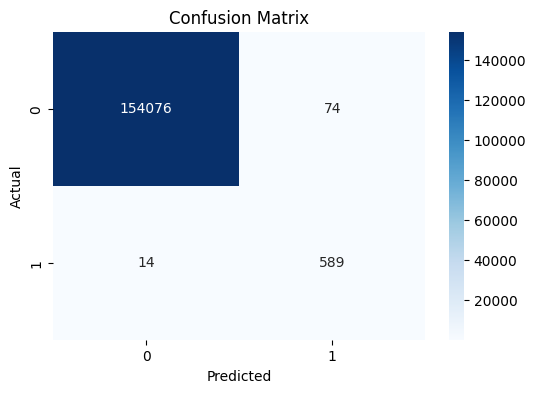

Accuracy: 0.9994313518962475
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    154150
           1       0.89      0.98      0.93       603

    accuracy                           1.00    154753
   macro avg       0.94      0.99      0.97    154753
weighted avg       1.00      1.00      1.00    154753

F2-Score: 0.9577235772357724
F1/2-Score (harmonik dari F1 dan F2): 0.9439102564102564


In [43]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, fbeta_score

y_pred_xgb_smote = grid_search_xgb_smote.predict(X_test_scaled)

# 1. Confusion Matrix
print("Confusion Matrix:")
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_xgb_smote), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# 2. Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred_xgb_smote))

# 3. Classification Report (berisi precision, recall, f1-score per kelas)
print("Classification Report:")
print(classification_report(y_test, y_pred_xgb_smote))

# 4. F2-Score
f2 = fbeta_score(y_test, y_pred_xgb_smote, beta=2, average='binary')  # binary → untuk dua kelas
print("F2-Score:", f2)

# 5. F1/2-Score (harmonic mean dari F1 dan F2 secara manual)
f1 = fbeta_score(y_test, y_pred_xgb_smote, beta=1, average='binary')
f2 = fbeta_score(y_test, y_pred_xgb_smote, beta=2, average='binary')
f1_2 = 2 * f1 * f2 / (f1 + f2) if (f1 + f2) != 0 else 0
print("F1/2-Score (harmonik dari F1 dan F2):", f1_2)

### XGboost with ADASYN

In [44]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Inisialisasi model XGBoost
xgb = XGBClassifier(eval_metric='logloss', random_state=42)

# Hyperparameter grid untuk XGBoost
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0]
}

# Inisialisasi GridSearchCV
grid_search_xgb_adasyn = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid_xgb,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    verbose=2
)

start_xgb_adasyn = time.time()
# Jalankan GridSearch
grid_search_xgb_adasyn.fit(X_train_adasyn, y_train_adasyn)

end_xgb_adasyn = time.time()
duration_xgb_adasyn = end_xgb_adasyn - start_xgb_adasyn

# Tampilkan hasil terbaik
print("Best Params:", grid_search_xgb_adasyn.best_params_)
print("Best Cross-Validated F1 Score:", grid_search_xgb_adasyn.best_score_)
print(f"Durasi training: {duration_xgb_adasyn:.2f} detik")

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Params: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.6}
Best Cross-Validated F1 Score: 0.9805181488918528
Durasi training: 165.05 detik
[CV] END learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.8; total time=  25.0s
[CV] END learning_rate=0.01, max_depth=5, n_estimators=300, subsample=0.8; total time=  27.4s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=300, subsample=0.6; total time=  20.5s
[CV] END learning_rate=0.1, max_depth=7, n_estimators=100, subsample=0.8; total time=  13.0s
[CV] END learning_rate=0.1, max_depth=7, n_estimators=300, subsample=1.0; total time=  34.2s
[CV] END learning_rate=0.2, max_depth=7, n_estimators=100, subsample=1.0; total time=  12.0s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.6; total time=  29.8s
[CV] END learning_rate=0.01, max_depth=7, n_estimators=100, subsample=0.8; total time=  12.6s
[CV] END learning_r

Confusion Matrix:


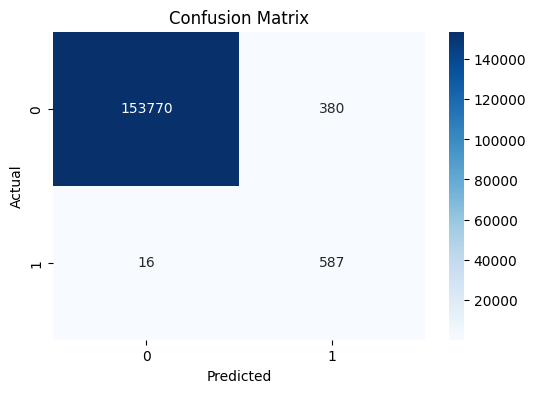

Accuracy: 0.9974410835331141
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    154150
           1       0.61      0.97      0.75       603

    accuracy                           1.00    154753
   macro avg       0.80      0.99      0.87    154753
weighted avg       1.00      1.00      1.00    154753

F2-Score: 0.8686001775673277
F1/2-Score (harmonik dari F1 dan F2): 0.8036692223439211


In [45]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, fbeta_score

y_pred_xgb_adasyn = grid_search_xgb_adasyn.predict(X_test_scaled)

# 1. Confusion Matrix
print("Confusion Matrix:")
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_xgb_adasyn), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# 2. Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred_xgb_adasyn))

# 3. Classification Report (berisi precision, recall, f1-score per kelas)
print("Classification Report:")
print(classification_report(y_test, y_pred_xgb_adasyn))

# 4. F2-Score
f2 = fbeta_score(y_test, y_pred_xgb_adasyn, beta=2, average='binary')  # binary → untuk dua kelas
print("F2-Score:", f2)

# 5. F1/2-Score (harmonic mean dari F1 dan F2 secara manual)
f1 = fbeta_score(y_test, y_pred_xgb_adasyn, beta=1, average='binary')
f2 = fbeta_score(y_test, y_pred_xgb_adasyn, beta=2, average='binary')
f1_2 = 2 * f1 * f2 / (f1 + f2) if (f1 + f2) != 0 else 0
print("F1/2-Score (harmonik dari F1 dan F2):", f1_2)

### XGBoost with ENN

In [46]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Inisialisasi model XGBoost
xgb = XGBClassifier(eval_metric='logloss', random_state=42)

# Hyperparameter grid untuk XGBoost
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0]
}

# Inisialisasi GridSearchCV
grid_search_xgb_enn = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid_xgb,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    verbose=2
)

start_xgb_enn = time.time()
# Jalankan GridSearch
grid_search_xgb_enn.fit(X_train_enn, y_train_enn)

end_xgb_enn = time.time()
duration_xgb_enn = end_xgb_enn - start_xgb_enn

# Tampilkan hasil terbaik
print("Best Params:", grid_search_xgb_enn.best_params_)
print("Best Cross-Validated F1 Score:", grid_search_xgb_enn.best_score_)
print(f"Durasi training: {duration_xgb_enn:.2f} detik")

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Params: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 300, 'subsample': 1.0}
Best Cross-Validated F1 Score: 0.9999360481053621
Durasi training: 192.03 detik


Confusion Matrix:


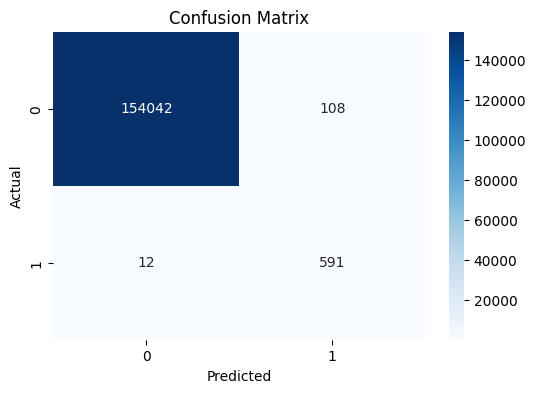

Accuracy: 0.9992245707676103
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    154150
           1       0.85      0.98      0.91       603

    accuracy                           1.00    154753
   macro avg       0.92      0.99      0.95    154753
weighted avg       1.00      1.00      1.00    154753

F2-Score: 0.9498553519768563
F1/2-Score (harmonik dari F1 dan F2): 0.9283694627709707
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.6; total time=  14.9s
[CV] END learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.8; total time=   7.5s
[CV] END learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.6; total time=  15.6s
[CV] END learning_rate=0.01, max_depth=7, n_estimators=200, subsample=0.8; total time=  18.5s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.8; total time=  10.9s
[CV] END learning_rate=0.1, max_depth=5, n_estimators=200, subsamp

In [47]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, fbeta_score

y_pred_xgb_enn = grid_search_xgb_enn.predict(X_test_scaled)

# 1. Confusion Matrix
print("Confusion Matrix:")
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_xgb_enn), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# 2. Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred_xgb_enn))

# 3. Classification Report (berisi precision, recall, f1-score per kelas)
print("Classification Report:")
print(classification_report(y_test, y_pred_xgb_enn))

# 4. F2-Score
f2 = fbeta_score(y_test, y_pred_xgb_enn, beta=2, average='binary')  # binary → untuk dua kelas
print("F2-Score:", f2)

# 5. F1/2-Score (harmonic mean dari F1 dan F2 secara manual)
f1 = fbeta_score(y_test, y_pred_xgb_enn, beta=1, average='binary')
f2 = fbeta_score(y_test, y_pred_xgb_enn, beta=2, average='binary')
f1_2 = 2 * f1 * f2 / (f1 + f2) if (f1 + f2) != 0 else 0
print("F1/2-Score (harmonik dari F1 dan F2):", f1_2)

## HyperParameter Tuning Adaboost

### Adaboost with Smote

In [48]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

ada = AdaBoostClassifier(random_state=42)

# Hyperparameter grid untuk AdaBoost
param_grid_ada = {
    'n_estimators': [50, 100, 150, 200],
    'learning_rate': [0.01, 0.1, 0.2],
}

# Inisialisasi GridSearchCV
grid_search_ada_smote = GridSearchCV(
    estimator=ada,
    param_grid=param_grid_ada,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    verbose=2
)

start_ada_smote = time.time()
# Jalankan GridSearch
grid_search_ada_smote.fit(X_train_smote, y_train_smote)

end_ada_smote = time.time()
duration_ada_smote = end_ada_smote - start_ada_smote

# Tampilkan hasil terbaik
print("Best Params:", grid_search_ada_smote.best_params_)
print("Best Cross-Validated F1 Score:", grid_search_ada_smote.best_score_)
print(f"Durasi training: {duration_ada_smote:.2f} detik")

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Params: {'learning_rate': 0.2, 'n_estimators': 200}
Best Cross-Validated F1 Score: 0.8524680265682182
Durasi training: 314.40 detik
[CV] END .................learning_rate=0.2, n_estimators=50; total time=  54.1s
[CV] END ................learning_rate=0.01, n_estimators=50; total time=  57.2s
[CV] END .................learning_rate=0.2, n_estimators=50; total time=  57.2s
[CV] END ................learning_rate=0.1, n_estimators=100; total time= 1.6min
[CV] END ................learning_rate=0.1, n_estimators=100; total time= 1.6min
[CV] END ................learning_rate=0.1, n_estimators=100; total time= 1.6min
[CV] END ...............learning_rate=0.01, n_estimators=100; total time= 1.7min
[CV] END ................learning_rate=0.2, n_estimators=100; total time= 1.7min
[CV] END ................learning_rate=0.2, n_estimators=100; total time= 1.7min
[CV] END ................learning_rate=0.1, n_estimators=100; total time=

Confusion Matrix:


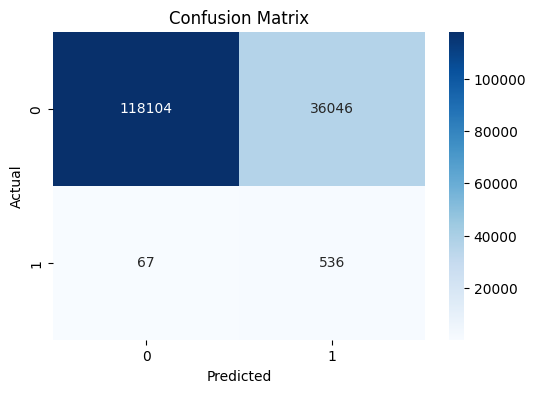

Accuracy: 0.766641034422596
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.77      0.87    154150
           1       0.01      0.89      0.03       603

    accuracy                           0.77    154753
   macro avg       0.51      0.83      0.45    154753
weighted avg       1.00      0.77      0.86    154753

F2-Score: 0.06872852233676977
F1/2-Score (harmonik dari F1 dan F2): 0.04061944656004062


In [49]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, fbeta_score

y_pred_ada_smote = grid_search_ada_smote.predict(X_test_scaled)

# 1. Confusion Matrix
print("Confusion Matrix:")
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_ada_smote), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# 2. Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred_ada_smote))

# 3. Classification Report (berisi precision, recall, f1-score per kelas)
print("Classification Report:")
print(classification_report(y_test, y_pred_ada_smote))

# 4. F2-Score
f2 = fbeta_score(y_test, y_pred_ada_smote, beta=2, average='binary')  # binary → untuk dua kelas
print("F2-Score:", f2)

# 5. F1/2-Score (harmonic mean dari F1 dan F2 secara manual)
f1 = fbeta_score(y_test, y_pred_ada_smote, beta=1, average='binary')
f2 = fbeta_score(y_test, y_pred_ada_smote, beta=2, average='binary')
f1_2 = 2 * f1 * f2 / (f1 + f2) if (f1 + f2) != 0 else 0
print("F1/2-Score (harmonik dari F1 dan F2):", f1_2)

### Adaboost with ADASYN

In [50]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

ada = AdaBoostClassifier(random_state=42)

param_grid_ada = {
    'n_estimators': [50, 100, 150, 200],
    'learning_rate': [0.01, 0.1, 0.2],
}

grid_search_ada_adasyn = GridSearchCV(
    estimator=ada,
    param_grid=param_grid_ada,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    verbose=2
)

start_ada_adasyn = time.time()
# Jalankan GridSearch
grid_search_ada_adasyn.fit(X_train_adasyn, y_train_adasyn)

end_ada_adasyn = time.time()
duration_ada_adasyn = end_ada_adasyn - start_ada_adasyn

print("Best Params:", grid_search_ada_adasyn.best_params_)
print("Best Cross-Validated F1 Score:", grid_search_ada_adasyn.best_score_)
print(f"Durasi training: {duration_ada_adasyn:.2f} detik")

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Params: {'learning_rate': 0.2, 'n_estimators': 200}
Best Cross-Validated F1 Score: 0.8249437482052719
Durasi training: 314.40 detik
[CV] END .................learning_rate=0.2, n_estimators=50; total time=  50.3s
[CV] END ................learning_rate=0.01, n_estimators=50; total time=  55.5s
[CV] END .................learning_rate=0.2, n_estimators=50; total time=  55.0s
[CV] END ................learning_rate=0.1, n_estimators=100; total time= 1.6min
[CV] END ...............learning_rate=0.01, n_estimators=100; total time= 1.7min
[CV] END ...............learning_rate=0.01, n_estimators=100; total time= 1.6min
[CV] END ...............learning_rate=0.01, n_estimators=100; total time= 1.7min
[CV] END ...............learning_rate=0.01, n_estimators=100; total time= 1.6min
[CV] END ................learning_rate=0.1, n_estimators=100; total time= 1.8min
[CV] END ................learning_rate=0.2, n_estimators=100; total time=

In [52]:
duration_ada_adasyn = end_ada_adasyn - start_ada_adasyn
duration_ada_adasyn

353.6846296787262

Confusion Matrix:


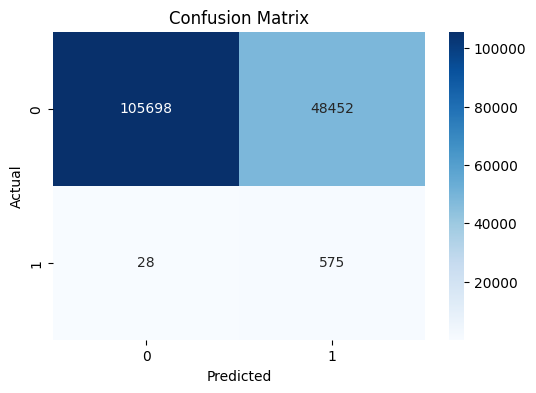

Accuracy: 0.6867265901145697
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.69      0.81    154150
           1       0.01      0.95      0.02       603

    accuracy                           0.69    154753
   macro avg       0.51      0.82      0.42    154753
weighted avg       1.00      0.69      0.81    154753

F2-Score: 0.05589144423491903
F1/2-Score (harmonik dari F1 dan F2): 0.03276091935686042


In [51]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, fbeta_score

y_pred_ada_adasyn = grid_search_ada_adasyn.predict(X_test_scaled)

# 1. Confusion Matrix
print("Confusion Matrix:")
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_ada_adasyn), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# 2. Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred_ada_adasyn))

# 3. Classification Report (berisi precision, recall, f1-score per kelas)
print("Classification Report:")
print(classification_report(y_test, y_pred_ada_adasyn))

# 4. F2-Score
f2 = fbeta_score(y_test, y_pred_ada_adasyn, beta=2, average='binary')  # binary → untuk dua kelas
print("F2-Score:", f2)

# 5. F1/2-Score (harmonic mean dari F1 dan F2 secara manual)
f1 = fbeta_score(y_test, y_pred_ada_adasyn, beta=1, average='binary')
f2 = fbeta_score(y_test, y_pred_ada_adasyn, beta=2, average='binary')
f1_2 = 2 * f1 * f2 / (f1 + f2) if (f1 + f2) != 0 else 0
print("F1/2-Score (harmonik dari F1 dan F2):", f1_2)

In [53]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

ada = AdaBoostClassifier(random_state=42)

param_grid_ada = {
    'n_estimators': [50, 100, 150, 200],
    'learning_rate': [0.01, 0.1, 0.2],
}

grid_search_ada_enn = GridSearchCV(
    estimator=ada,
    param_grid=param_grid_ada,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    verbose=2
)

start_ada_enn = time.time()
# Jalankan GridSearch
grid_search_ada_enn.fit(X_train_enn, y_train_enn)

end_ada_enn = time.time()
duration_ada_enn = end_ada_enn - start_ada_enn

print("Best Params:", grid_search_ada_enn.best_params_)
print("Best Cross-Validated F1 Score:", grid_search_ada_enn.best_score_)
print(f"Durasi training: {duration_ada_enn:.2f} detik")

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Params: {'learning_rate': 0.2, 'n_estimators': 200}
Best Cross-Validated F1 Score: 0.8528832155479644
Durasi training: 305.34 detik
[CV] END ................learning_rate=0.01, n_estimators=50; total time=  54.8s
[CV] END ................learning_rate=0.01, n_estimators=50; total time=  56.7s
[CV] END .................learning_rate=0.2, n_estimators=50; total time=  55.2s
[CV] END ................learning_rate=0.1, n_estimators=100; total time= 1.6min
[CV] END ................learning_rate=0.1, n_estimators=100; total time= 1.6min
[CV] END ................learning_rate=0.1, n_estimators=100; total time= 1.5min
[CV] END ................learning_rate=0.2, n_estimators=100; total time= 1.6min
[CV] END ................learning_rate=0.1, n_estimators=100; total time= 1.7min
[CV] END ...............learning_rate=0.01, n_estimators=100; total time= 1.8min
[CV] END ...............learning_rate=0.01, n_estimators=100; total time=

Confusion Matrix:


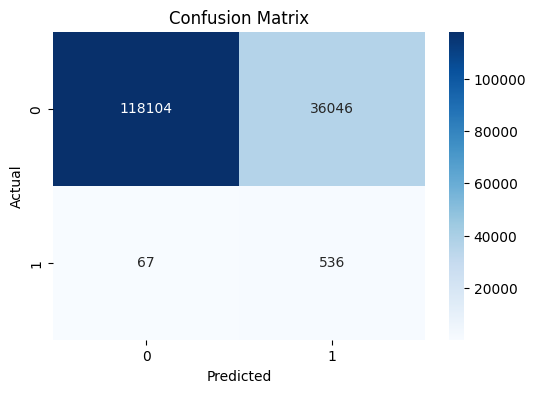

Accuracy: 0.766641034422596
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.77      0.87    154150
           1       0.01      0.89      0.03       603

    accuracy                           0.77    154753
   macro avg       0.51      0.83      0.45    154753
weighted avg       1.00      0.77      0.86    154753

F2-Score: 0.06872852233676977
F1/2-Score (harmonik dari F1 dan F2): 0.04061944656004062


In [54]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, fbeta_score

y_pred_ada_enn = grid_search_ada_enn.predict(X_test_scaled)

# 1. Confusion Matrix
print("Confusion Matrix:")
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_ada_enn), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# 2. Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred_ada_enn))

# 3. Classification Report (berisi precision, recall, f1-score per kelas)
print("Classification Report:")
print(classification_report(y_test, y_pred_ada_enn))

# 4. F2-Score
f2 = fbeta_score(y_test, y_pred_ada_enn, beta=2, average='binary')  # binary → untuk dua kelas
print("F2-Score:", f2)

# 5. F1/2-Score (harmonic mean dari F1 dan F2 secara manual)
f1 = fbeta_score(y_test, y_pred_ada_enn, beta=1, average='binary')
f2 = fbeta_score(y_test, y_pred_ada_enn, beta=2, average='binary')
f1_2 = 2 * f1 * f2 / (f1 + f2) if (f1 + f2) != 0 else 0
print("F1/2-Score (harmonik dari F1 dan F2):", f1_2)

## Hyperparameter LightGBM

### LGBM with SMOTE

In [19]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

lgbm = LGBMClassifier(random_state=42)

param_grid_lgbm = {
    'n_estimators': [50, 100],
    'learning_rate': [0.01, 0.1]
}

grid_search_lgbm_smote = GridSearchCV(
    estimator=lgbm,
    param_grid=param_grid_lgbm,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    verbose=2
)

start_lgbm_smote = time.time()
# Jalankan GridSearch
grid_search_lgbm_smote.fit(X_train_smote, y_train_smote)

end_lgbm_smote = time.time()
duration_lgbm_smote = end_lgbm_smote - start_lgbm_smote

print("Best Params:", grid_search_lgbm_smote.best_params_)
print("Best Cross-Validated F1 Score:", grid_search_lgbm_smote.best_score_)
print(f"Durasi training: {duration_lgbm_smote:.2f} detik")

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[LightGBM] [Info] Number of positive: 287746, number of negative: 287747
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.338898 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2550
[LightGBM] [Info] Number of data points in the train set: 575493, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499999 -> initscore=-0.000003
[LightGBM] [Info] Start training from score -0.000003
[CV] END ................learning_rate=0.01, n_estimators=50; total time=11.5min
[LightGBM] [Info] Number of positive: 287746, number of negative: 287747
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.412149 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2550
[LightGBM] [Info] Number of data points in the train set: 575493, number of used features: 10

Confusion Matrix:


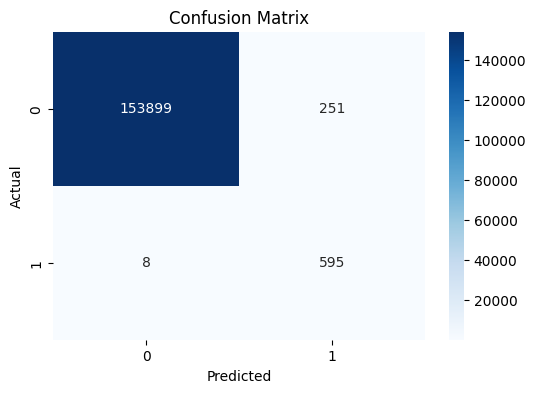

Accuracy: 0.9983263652400923
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    154150
           1       0.70      0.99      0.82       603

    accuracy                           1.00    154753
   macro avg       0.85      0.99      0.91    154753
weighted avg       1.00      1.00      1.00    154753

F2-Score: 0.9131368937998773
F1/2-Score (harmonik dari F1 dan F2): 0.8647627352663324


In [20]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, fbeta_score

y_pred_lgbm_smote = grid_search_lgbm_smote.predict(X_test_scaled)

# 1. Confusion Matrix
print("Confusion Matrix:")
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_lgbm_smote), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# 2. Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred_lgbm_smote))

# 3. Classification Report (berisi precision, recall, f1-score per kelas)
print("Classification Report:")
print(classification_report(y_test, y_pred_lgbm_smote))

# 4. F2-Score
f2 = fbeta_score(y_test, y_pred_lgbm_smote, beta=2, average='binary')  # binary → untuk dua kelas
print("F2-Score:", f2)

# 5. F1/2-Score (harmonic mean dari F1 dan F2 secara manual)
f1 = fbeta_score(y_test, y_pred_lgbm_smote, beta=1, average='binary')
f2 = fbeta_score(y_test, y_pred_lgbm_smote, beta=2, average='binary')
f1_2 = 2 * f1 * f2 / (f1 + f2) if (f1 + f2) != 0 else 0
print("F1/2-Score (harmonik dari F1 dan F2):", f1_2)

### LGBM with Adasyn

In [22]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

lgbm = LGBMClassifier(random_state=42)

param_grid_lgbm = {
    'n_estimators': [50, 100],
    'learning_rate': [0.01, 0.1]
}

grid_search_lgbm_adasyn = GridSearchCV(
    estimator=lgbm,
    param_grid=param_grid_lgbm,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    verbose=2
)

start_lgbm_adasyn = time.time()

grid_search_lgbm_adasyn.fit(X_train_adasyn, y_train_adasyn)

end_lgbm_adasyn = time.time()
duration_lgbm_adasyn = end_lgbm_adasyn - start_lgbm_adasyn

print("Best Params:", grid_search_lgbm_adasyn.best_params_)
print("Best Cross-Validated F1 Score:", grid_search_lgbm_adasyn.best_score_)
print(f"Durasi training: {duration_lgbm_adasyn:.2f} detik")

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[LightGBM] [Info] Number of positive: 287685, number of negative: 287746
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.490362 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2550
[LightGBM] [Info] Number of data points in the train set: 575431, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499947 -> initscore=-0.000212
[LightGBM] [Info] Start training from score -0.000212
[CV] END ................learning_rate=0.01, n_estimators=50; total time=11.7min
[LightGBM] [Info] Number of positive: 287685, number of negative: 287746
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.152711 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2549
[LightGBM] [Info] Number of data points in the train set: 575431, number of used features: 10

Confusion Matrix:


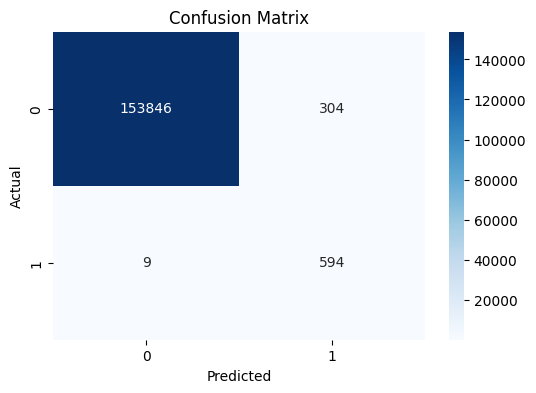

Accuracy: 0.9979774220855169
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    154150
           1       0.66      0.99      0.79       603

    accuracy                           1.00    154753
   macro avg       0.83      0.99      0.90    154753
weighted avg       1.00      1.00      1.00    154753

F2-Score: 0.8972809667673716
F1/2-Score (harmonik dari F1 dan F2): 0.8410619469026549


In [23]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, fbeta_score

y_pred_lgbm_adasyn = grid_search_lgbm_adasyn.predict(X_test_scaled)

# 1. Confusion Matrix
print("Confusion Matrix:")
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_lgbm_adasyn), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# 2. Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred_lgbm_adasyn))

# 3. Classification Report (berisi precision, recall, f1-score per kelas)
print("Classification Report:")
print(classification_report(y_test, y_pred_lgbm_adasyn))

# 4. F2-Score
f2 = fbeta_score(y_test, y_pred_lgbm_adasyn, beta=2, average='binary')  # binary → untuk dua kelas
print("F2-Score:", f2)

# 5. F1/2-Score (harmonic mean dari F1 dan F2 secara manual)
f1 = fbeta_score(y_test, y_pred_lgbm_adasyn, beta=1, average='binary')
f2 = fbeta_score(y_test, y_pred_lgbm_adasyn, beta=2, average='binary')
f1_2 = 2 * f1 * f2 / (f1 + f2) if (f1 + f2) != 0 else 0
print("F1/2-Score (harmonik dari F1 dan F2):", f1_2)

In [ ]:
grid_search_lgbm_adasyn.best_params_

### LGBM with ENN

In [24]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

lgbm = LGBMClassifier(random_state=42)

param_grid_lgbm = {
    'n_estimators': [50, 100],
    'learning_rate': [0.01, 0.1]
}

grid_search_lgbm_enn = GridSearchCV(
    estimator=lgbm,
    param_grid=param_grid_lgbm,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    verbose=2
)

start_lgbm_enn = time.time()

grid_search_lgbm_enn.fit(X_train_enn, y_train_enn)

end_lgbm_enn = time.time()
duration_lgbm_enn = end_lgbm_enn - start_lgbm_enn

print("Best Params:", grid_search_lgbm_enn.best_params_)
print("Best Cross-Validated F1 Score:", grid_search_lgbm_enn.best_score_)
print(f"Durasi training: {duration_lgbm_enn:.2f} detik")

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[LightGBM] [Info] Number of positive: 287699, number of negative: 287296
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.463183 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2550
[LightGBM] [Info] Number of data points in the train set: 574995, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500350 -> initscore=0.001402
[LightGBM] [Info] Start training from score 0.001402
[CV] END ................learning_rate=0.01, n_estimators=50; total time=11.6min
[LightGBM] [Info] Number of positive: 287699, number of negative: 287295
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.445157 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2550
[LightGBM] [Info] Number of data points in the train set: 574994, number of used features: 10
[

Confusion Matrix:


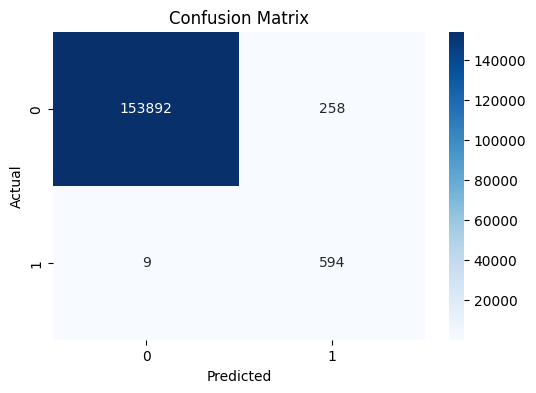

Accuracy: 0.998274669957933
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    154150
           1       0.70      0.99      0.82       603

    accuracy                           1.00    154753
   macro avg       0.85      0.99      0.91    154753
weighted avg       1.00      1.00      1.00    154753

F2-Score: 0.9099264705882353
F1/2-Score (harmonik dari F1 dan F2): 0.8606824603347099


In [25]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, fbeta_score

y_pred_lgbm_enn = grid_search_lgbm_enn.predict(X_test_scaled)

# 1. Confusion Matrix
print("Confusion Matrix:")
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_lgbm_enn), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# 2. Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred_lgbm_enn))

# 3. Classification Report (berisi precision, recall, f1-score per kelas)
print("Classification Report:")
print(classification_report(y_test, y_pred_lgbm_enn))

# 4. F2-Score
f2 = fbeta_score(y_test, y_pred_lgbm_enn, beta=2, average='binary')  # binary → untuk dua kelas
print("F2-Score:", f2)

# 5. F1/2-Score (harmonic mean dari F1 dan F2 secara manual)
f1 = fbeta_score(y_test, y_pred_lgbm_enn, beta=1, average='binary')
f2 = fbeta_score(y_test, y_pred_lgbm_enn, beta=2, average='binary')
f1_2 = 2 * f1 * f2 / (f1 + f2) if (f1 + f2) != 0 else 0
print("F1/2-Score (harmonik dari F1 dan F2):", f1_2)

In [ ]:
grid_search_lgbm_enn.best_params_

In [27]:
with open('lgbm_smote.pkl', 'wb') as f:
    pickle.dump(grid_search_lgbm_smote, f)